# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# !pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 576


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except KeyError:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | oulmes
Processing Record 4 of Set 1 | pionerskiy
Processing Record 5 of Set 1 | el calafate
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | westport
Processing Record 8 of Set 1 | nadym
Processing Record 9 of Set 1 | obigarm
Processing Record 10 of Set 1 | copala
Processing Record 11 of Set 1 | stanley
Processing Record 12 of Set 1 | pombas
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | lebu
Processing Record 16 of Set 1 | ribeira grande
Processing Record 17 of Set 1 | coquimbo
Processing Record 18 of Set 1 | yeppoon
Processing Record 19 of Set 1 | yangor
City not found. Skipping...
Processing Record 20 of Set 1 | espargos
City not found. Skipping...
Processing Record 21 of Set 1 | bethel
Processing Record 22 of Set 1

Processing Record 38 of Set 4 | burutu
Processing Record 39 of Set 4 | yaren
Processing Record 40 of Set 4 | castillos
Processing Record 41 of Set 4 | crane
Processing Record 42 of Set 4 | hasaki
Processing Record 43 of Set 4 | maragogi
Processing Record 44 of Set 4 | san jose village
City not found. Skipping...
Processing Record 45 of Set 4 | newman
Processing Record 46 of Set 4 | homer
Processing Record 47 of Set 4 | kidal
Processing Record 48 of Set 4 | fort bragg
Processing Record 49 of Set 4 | mar del plata
Processing Record 0 of Set 5 | kontiolahti
Processing Record 1 of Set 5 | mount pearl
Processing Record 2 of Set 5 | cumaribo
City not found. Skipping...
Processing Record 3 of Set 5 | kerikeri
Processing Record 4 of Set 5 | porto novo
Processing Record 5 of Set 5 | chiras
Processing Record 6 of Set 5 | tera
Processing Record 7 of Set 5 | bargarh
Processing Record 8 of Set 5 | bichura
Processing Record 9 of Set 5 | utrik
Processing Record 10 of Set 5 | merizo village
Processing

Processing Record 30 of Set 8 | ishim
Processing Record 31 of Set 8 | martapura
Processing Record 32 of Set 8 | milagros
Processing Record 33 of Set 8 | ta`u
Processing Record 34 of Set 8 | nanakuli
Processing Record 35 of Set 8 | kyzyl
Processing Record 36 of Set 8 | nizhnesortymskiy
Processing Record 37 of Set 8 | fort mcmurray
Processing Record 38 of Set 8 | tranovaho
City not found. Skipping...
Processing Record 39 of Set 8 | whitecourt
Processing Record 40 of Set 8 | jianguang
Processing Record 41 of Set 8 | bechar
Processing Record 42 of Set 8 | yarega
Processing Record 43 of Set 8 | melchor de mencos
Processing Record 44 of Set 8 | fisterra
Processing Record 45 of Set 8 | nago
Processing Record 46 of Set 8 | huetamo de nunez
Processing Record 47 of Set 8 | hinesville
Processing Record 48 of Set 8 | priozersk
Processing Record 49 of Set 8 | am djarass
City not found. Skipping...
Processing Record 0 of Set 9 | fiambala
Processing Record 1 of Set 9 | stony plain
Processing Record 2

Processing Record 19 of Set 12 | salinas
Processing Record 20 of Set 12 | gwio kura
Processing Record 21 of Set 12 | horta
Processing Record 22 of Set 12 | outjo
Processing Record 23 of Set 12 | kalmunai
Processing Record 24 of Set 12 | hefei
Processing Record 25 of Set 12 | tabarka
-----------------------------
Data Retrieval Complete      
-----------------------------


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       552
Date          552
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,4.15,95,95,14.28,TF,1701994307
1,jamestown,42.0970,-79.2353,3.77,92,75,1.54,US,1701994191
2,oulmes,33.4258,-6.0014,10.56,91,100,2.07,MA,1701994476
3,pionerskiy,54.9508,20.2275,-3.09,85,94,7.16,RU,1701994479
4,el calafate,-50.3408,-72.2768,16.65,51,56,3.52,AR,1701994483


In [7]:
# Convert datetime to readable date format
city_data_df['Date']=(pd.to_datetime(city_data_df['Date'],unit='s')).dt.date
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,4.15,95,95,14.28,TF,2023-12-08
1,jamestown,42.0970,-79.2353,3.77,92,75,1.54,US,2023-12-08
2,oulmes,33.4258,-6.0014,10.56,91,100,2.07,MA,2023-12-08
3,pionerskiy,54.9508,20.2275,-3.09,85,94,7.16,RU,2023-12-08
4,el calafate,-50.3408,-72.2768,16.65,51,56,3.52,AR,2023-12-08


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,4.15,95,95,14.28,TF,2023-12-08
1,jamestown,42.0970,-79.2353,3.77,92,75,1.54,US,2023-12-08
2,oulmes,33.4258,-6.0014,10.56,91,100,2.07,MA,2023-12-08
3,pionerskiy,54.9508,20.2275,-3.09,85,94,7.16,RU,2023-12-08
4,el calafate,-50.3408,-72.2768,16.65,51,56,3.52,AR,2023-12-08


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

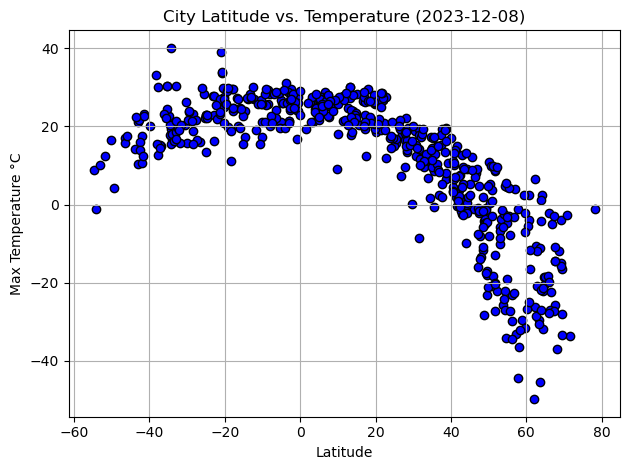

In [13]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature °C")
date=city_data_df['Date'].min()
plt.title(f"City Latitude vs. Temperature ({date})")
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

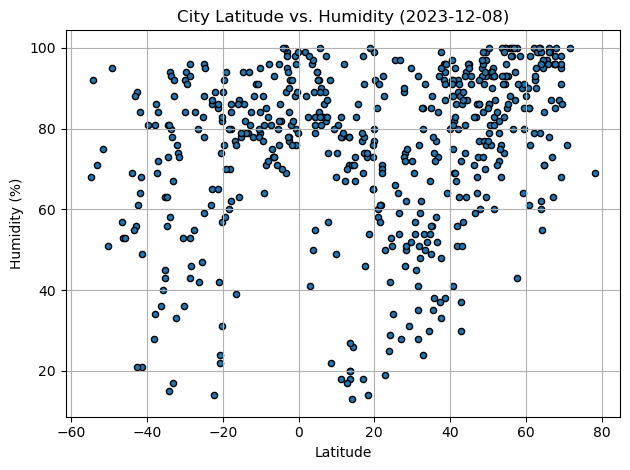

In [14]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter', x='Lat', y='Humidity', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Humidity ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

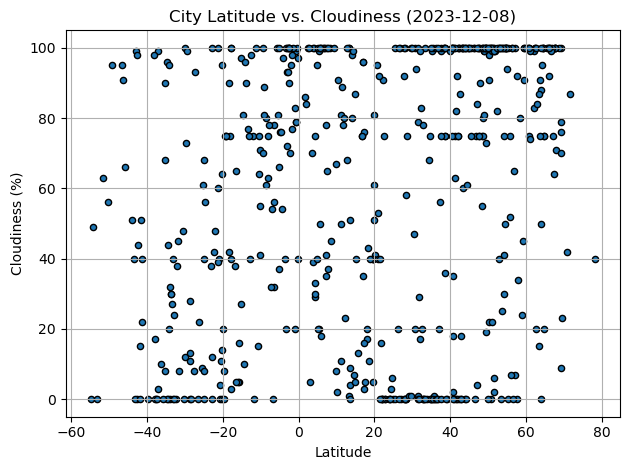

In [15]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Cloudiness ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

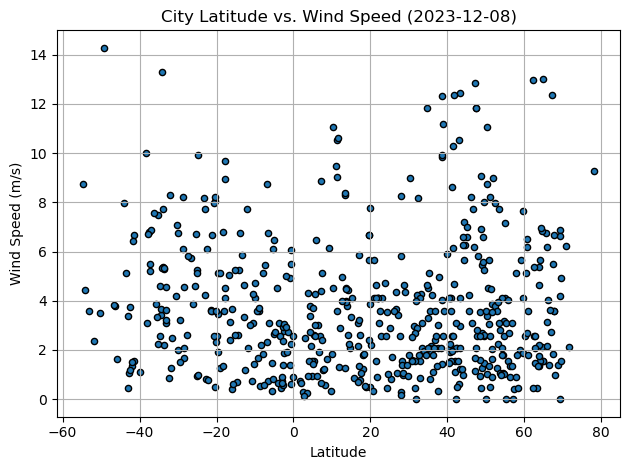

In [16]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Wind Speed ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,jamestown,42.0970,-79.2353,3.77,92,75,1.54,US,2023-12-08
2,oulmes,33.4258,-6.0014,10.56,91,100,2.07,MA,2023-12-08
3,pionerskiy,54.9508,20.2275,-3.09,85,94,7.16,RU,2023-12-08
6,westport,41.1415,-73.3579,3.21,82,100,2.57,US,2023-12-08
7,nadym,65.5333,72.5167,-19.88,97,100,6.74,RU,2023-12-08


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude <= 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<= 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,4.15,95,95,14.28,TF,2023-12-08
4,el calafate,-50.3408,-72.2768,16.65,51,56,3.52,AR,2023-12-08
5,waitangi,-43.9535,-176.5597,14.34,69,51,7.99,NZ,2023-12-08
12,adamstown,-25.0660,-130.1015,22.99,78,68,5.27,PN,2023-12-08
13,grytviken,-54.2811,-36.5092,-1.17,92,49,4.44,GS,2023-12-08


###  Temperature vs. Latitude Linear Regression Plot

Linear equation: y = -0.8x + 35.65
The r-value is: -0.8502577487993883


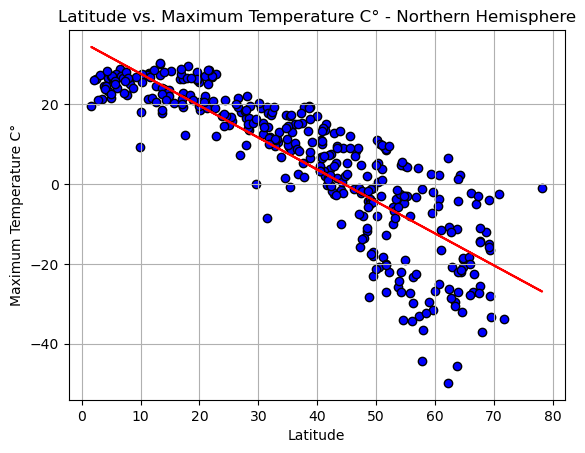

In [20]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs. Temperature in Northern Hemisphere")

# Define a function to create Linear Regression plots
def lr_funcV2(x,y,name,vbl,hemi):
    (slope,intercept,rvalue,pvalue,stderror)=linregress(x,y)
    reg_values= x*slope + intercept
    plt.plot(x,reg_values,color='r')
    plt.title(f'Latitude vs. {vbl} - {hemi}')
    plt.xlabel('Latitude')
    plt.ylabel(vbl)
    line_eq = f'y = {(round(slope,2))}x + {(round(intercept,2))}'
    print(f'Linear equation: {line_eq}')
    plt.savefig(f"../output_data/LinearRegresion_{name}.png")
    print(f'The r-value is: {rvalue}')

x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
name = 'NH_LatVsMaxTemp'
vbl = 'Maximum Temperature C°'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = 0.22x + 27.34
The r-value is: 0.5170567343195946


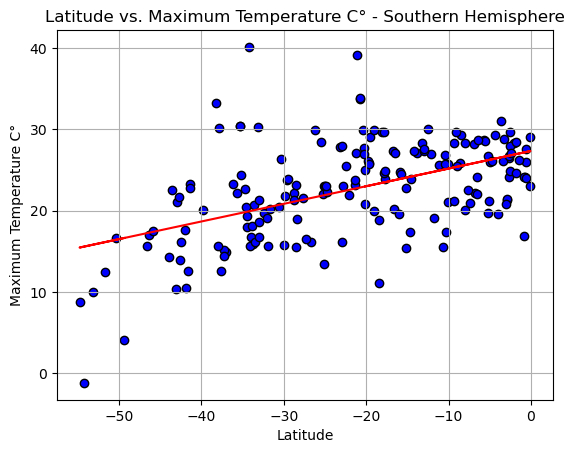

In [21]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
name = 'SH_LatVsMaxTemp'
vbl = 'Maximum Temperature C°'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

There is a strong relationship between latitude and maximum temperature. In the Northern Hemisphere, it is a negative correlation, while in the Southern Hemisphere, it is a positive correlation. Maximum Temperature increases as we approach the equator.

### Humidity vs. Latitude Linear Regression Plot

Linear equation: y = 0.35x + 63.35
The r-value is: 0.3212785255451909


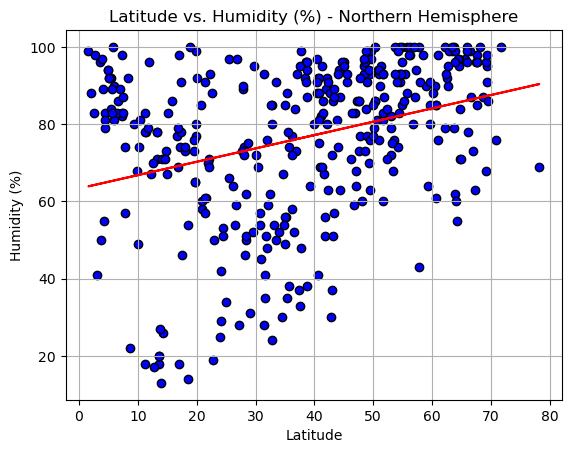

In [22]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Humidity'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
name = 'NH_LatVsHumidity'
vbl = 'Humidity (%)'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = 0.54x + 85.21
The r-value is: 0.396728074925097


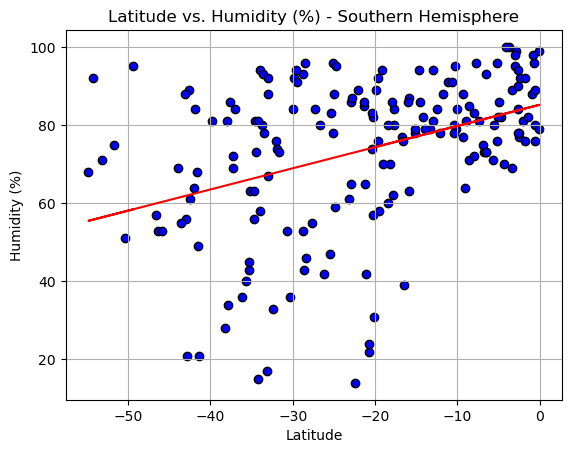

In [23]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Humidity'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
name = 'SH_LatVsHumidity'
vbl = 'Humidity (%)'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

There is little to no relationship between latitude and humidity based on the data available. The linear equation for each hemisphere shows a very slightly positive correlation, which implies that proximity to the equator has no bearing on humdity. The scatter points show that the data is too spread for there to be any reliable correlation between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

Linear equation: y = 0.47x + 43.9
The r-value is: 0.2247197370657577


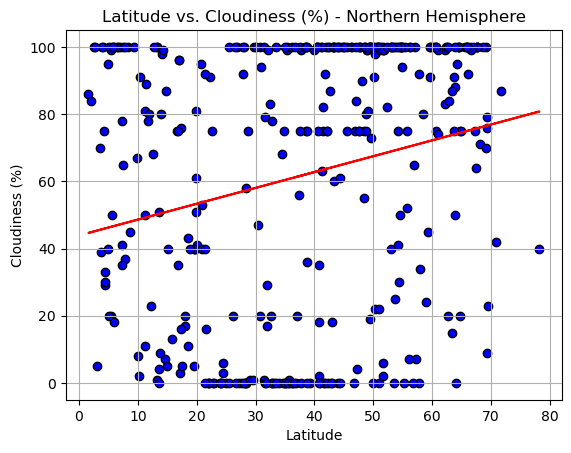

In [24]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
name = 'NH_LatVsCloudiness'
vbl = 'Cloudiness (%)'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = 0.99x + 71.65
The r-value is: 0.3889195622647986


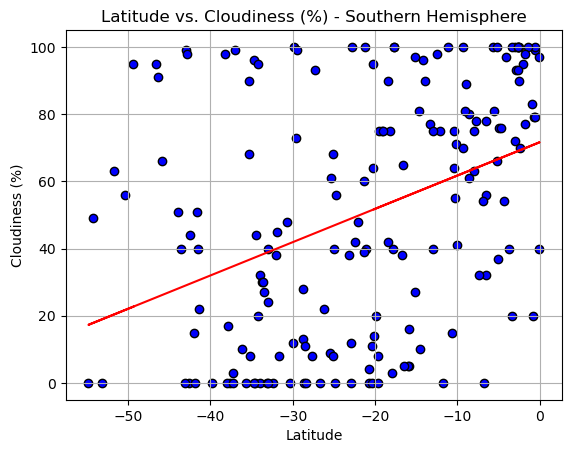

In [25]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
name = 'SH_LatVsCloudiness'
vbl = 'Cloudiness (%)'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

There is little to no relationship between latitude and cloudiness based on the data available. The linear equation for each hemisphere shows a positive correlation, which implies that proximity to the equator has no bearing on cloudiness. The scatter points show that the data is too spread for there to be any reliable correlation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

Linear equation: y = 0.02x + 3.01
The r-value is: 0.10294145655438147


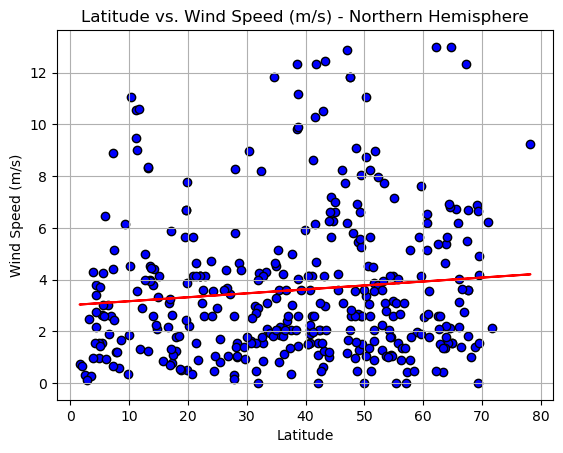

In [26]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
name = 'NH_LatVsWindSpeed'
vbl = 'Wind Speed (m/s)'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = -0.05x + 2.86
The r-value is: -0.27040827061959116


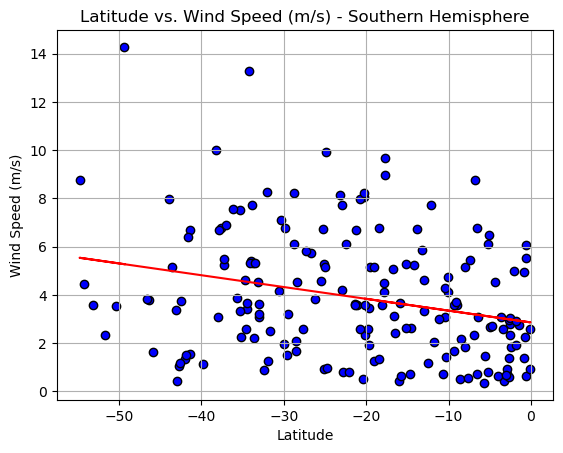

In [27]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
name = 'SH_LatVsWindSpeed'
vbl = 'Wind Speed (m/s)'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

There is little to no relationship between latitude and wind speed based on the data available. The r-value is low for both hemispheres and the scatter points show that the data is too spread for there to be any reliable correlation between latitude and wind speed.